# WeatherPy
## Goals for this Project:
* Collect and Evaluate weather data from 500+ random cities using citipy and OpenWeatherMap API
* Create scatter plots for: Temperature vs. Latitude, Humidity vs. Latitude, Cloudiness vs. Latitude, and Wind Speed vs. Latitude
* Export data to a csv file

In [38]:
# import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import os
import requests

import time
from citipy import citipy


In [28]:
# create a list of cities

# create a list of random latitude and longitude values between -90 and 90 and -180 and 180 respectively
lat = np.random.uniform(low = -90.00, high =  90.00, size = 1200)
long = np.random.uniform(low = -180.00, high = 180.00, size = 1200)
lat_long = []
lat_long = zip(lat,long)

# using citipy assign cities nearest to listed lat long list
cities = []
for location in lat_long:
    # grab city name
    city = citipy.nearest_city(location[0], location[1]).city_name
    # collect unique instances
    if city not in cities:
        cities.append(city)

print(f"There are {len(cities)} cities listed")

There are 543 cities listed


In [29]:
# Perform API Calls

# import api key from config.py
from config import api_key

# define key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# print(url)




In [30]:
# List of city data
city_data = []


# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 1 | chokurdakh
Processing Record 2 of Set 1 | tohana
Processing Record 3 of Set 1 | esperance
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | grindavik
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | pevek
Processing Record 10 of Set 1 | amur
Processing Record 11 of Set 1 | guerrero negro
Processing Record 12 of Set 1 | saint george
Processing Record 13 of Set 1 | mar del plata
Processing Record 14 of Set 1 | opuwo
Processing Record 15 of Set 1 | egvekinot
Processing Record 16 of Set 1 | tambacounda
Processing Record 17 of Set 1 | ismailia
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | college
Processing Record 21 of Set 1 | nikolskoye
Processing Record 22 of Set 1 | rawson
Processing Record 23 of Set 1 | kajaani
Processing Record 24 of Set 1 | cidreira
Processing Record 25

In [33]:
# define the output file path
output_csv = 'output/cities.csv'

# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_csv, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          491
Cloudiness    491
Country       491
Date          491
Humidity      491
Lat           491
Lng           491
Max Temp      491
Wind Speed    491
dtype: int64

In [34]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,chokurdakh,95,RU,1575306795,97,70.62,147.90,-27.71,2.42
1,tohana,0,IN,1575306796,43,29.71,75.90,59.34,2.48
2,esperance,90,AU,1575306796,87,-33.86,121.89,55.40,6.93
3,cape town,20,ZA,1575306796,63,-33.93,18.42,68.00,13.87
4,grindavik,90,IS,1575306796,100,63.84,-22.43,48.20,31.09


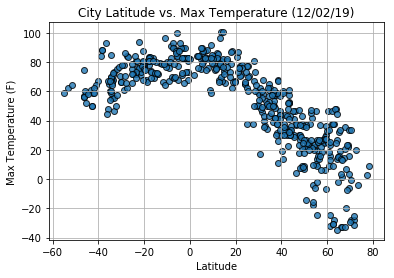

In [39]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig1.png")

# Show plot
plt.show()

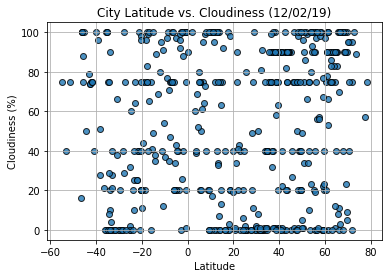

In [40]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig3.png")

# Show plot
plt.show()

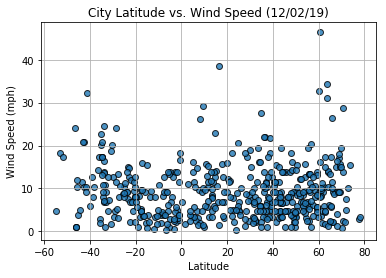

In [41]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/Fig4.png")

# Show plot
plt.show()